In [1]:
import pandas as pd
import numpy as np

In [2]:
>>> import os
>>> os.getcwd()

'/Users/patrickcarlin/Documents/IST 718 - Big Data Analytics/Project Data'

In [3]:

>>> os.chdir("/Users/patrickcarlin/Documents/IST 718 - Big Data Analytics/Project Data/Data")
>>> os.getcwd()

'/Users/patrickcarlin/Documents/IST 718 - Big Data Analytics/Project Data/Data'

In [4]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
df = pd.read_csv("Destination_BOS.csv") 
df.head()

/Users/patrickcarlin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (52,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,...,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM
0,1,9/10/18,UA,19977,N75433,2402,LAX,"Los Angeles, CA",CA,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,9/10/18,UA,19977,N598UA,2396,SFO,"San Francisco, CA",CA,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,9/10/18,UA,19977,N546UA,2360,SFO,"San Francisco, CA",CA,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,9/10/18,UA,19977,N24702,2323,EWR,"Newark, NJ",NJ,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,9/10/18,UA,19977,N38451,2322,EWR,"Newark, NJ",NJ,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['TAXI_OUT'].fillna(0, inplace=True)##### needed for later

cancelled = df[df['CANCELLED']==1]

cancelled.tail()

,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,...,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM
143783,7,4/15/18,MQ,20398,N846AE,3971,SYR,"Syracuse, NY",NY,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143799,7,4/15/18,MQ,20398,N846AE,4096,ROC,"Rochester, NY",NY,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144095,7,4/15/18,YX,20452,N206JQ,5886,MKE,"Milwaukee, WI",WI,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144101,7,4/15/18,YX,20452,N214JQ,6074,LGA,"New York, NY",NY,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144313,7,4/15/18,AA,19805,N103US,2034,CLT,"Charlotte, NC",NC,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import matplotlib.pyplot as plt

font = {'size'   : 16}
plt.rc('font', **font)

days_cancelled = cancelled['CANCELLED'].groupby(df['DAY_OF_WEEK']).count()
days_total = df['CANCELLED'].groupby(df['DAY_OF_WEEK']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

plt.show()

<Figure size 1200x600 with 1 Axes>

/Users/patrickcarlin/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


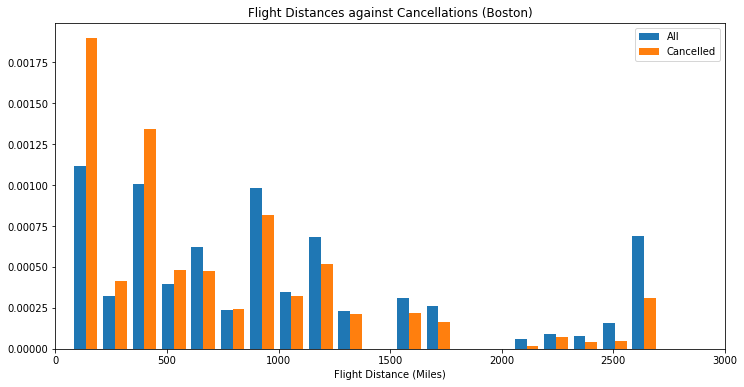

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['DISTANCE'], cancelled['DISTANCE']], normed=1, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,3000)
ax.set_xlabel('Flight Distance (Miles)')
ax.set_title('Flight Distances against Cancellations (Boston)')

plt.legend()
plt.show()

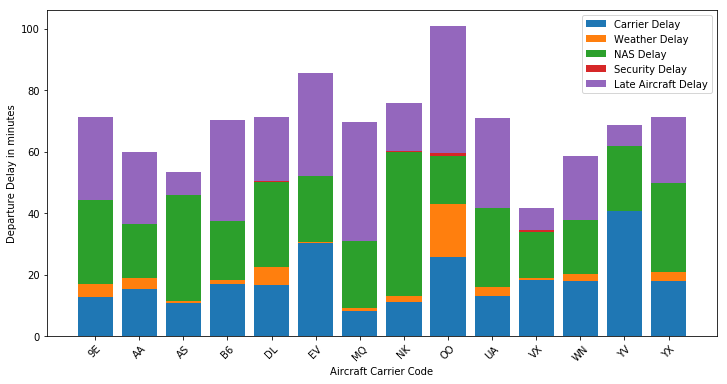

In [8]:
import matplotlib.pyplot as plt

df['total_delay'] = (df['CARRIER_DELAY'] + df['WEATHER_DELAY']
             + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY'])

df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)
df_delayed.head()

carrier_group = df_delayed['CARRIER_DELAY'].groupby(df_delayed['OP_UNIQUE_CARRIER']).mean()
weather_group = df_delayed['WEATHER_DELAY'].groupby(df_delayed['OP_UNIQUE_CARRIER']).mean()
nas_group = df_delayed['NAS_DELAY'].groupby(df_delayed['OP_UNIQUE_CARRIER']).mean()
security_group = df_delayed['SECURITY_DELAY'].groupby(df_delayed['OP_UNIQUE_CARRIER']).mean()
late_group = df_delayed['LATE_AIRCRAFT_DELAY'].groupby(df_delayed['OP_UNIQUE_CARRIER']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()

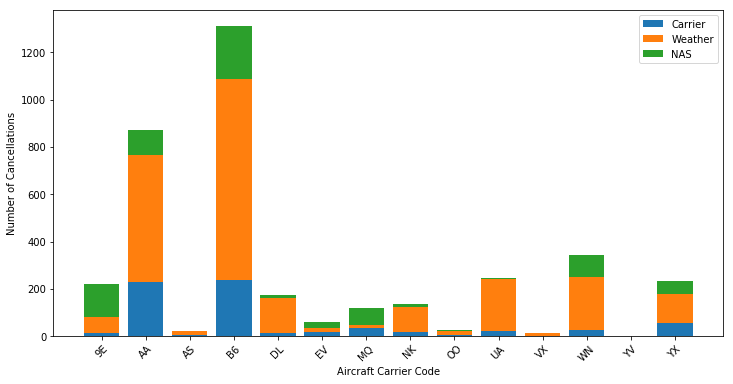

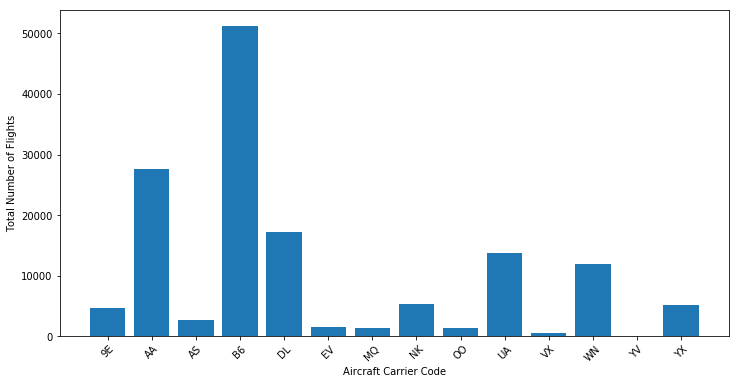

In [9]:
import matplotlib.pyplot as plt

cancelled_group = cancelled.groupby(['OP_UNIQUE_CARRIER','CANCELLATION_CODE']).size().reindex(fill_value=0.0).unstack()
cg = cancelled_group.fillna(0)

b_bottom = cg.loc[:,'A'].values
c_bottom = b_bottom + cg.loc[:,'B'].values
d_bottom = c_bottom + cg.loc[:,'B'].values

x = cg.loc[:,'A'].index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),cg.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cg.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cg.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
#ax.bar(np.arange(len(x)),cancelled_group.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Number of Cancellations')

plt.legend()
plt.show()

total_flights_per_carrier = df['OP_UNIQUE_CARRIER'].groupby(df['OP_UNIQUE_CARRIER']).count()

fig, ax1 = plt.subplots(figsize = (12,6))

x = total_flights_per_carrier.index.values

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x, rotation = 45)
ax1.bar(np.arange(len(x)),total_flights_per_carrier.values, align='center')

ax1.set_xlabel('Aircraft Carrier Code')
ax1.set_ylabel('Total Number of Flights')

plt.show()

In [10]:
carrier_flights = df['OP_UNIQUE_CARRIER'].groupby(df['OP_UNIQUE_CARRIER']).count()
carrier_cancelled = df['CANCELLED'].groupby(df['OP_UNIQUE_CARRIER']).sum()
carrier_delayed = df_delayed['OP_UNIQUE_CARRIER'].groupby(df_delayed['OP_UNIQUE_CARRIER']).count()
carrier_diverted = df['DIVERTED'].groupby(df['OP_UNIQUE_CARRIER']).sum()
carrier_avg_time = df['AIR_TIME'].groupby(df['OP_UNIQUE_CARRIER']).mean()
carrier_avg_dist = df['DISTANCE'].groupby(df['OP_UNIQUE_CARRIER']).mean()
carrier_avg_delay = df['total_delay'].groupby(df['OP_UNIQUE_CARRIER']).mean()
carrier_avg_taxiIn = df['TAXI_IN'].groupby(df['OP_UNIQUE_CARRIER']).mean()
carrier_avg_taxiOut = df['TAXI_OUT'].groupby(df['OP_UNIQUE_CARRIER']).mean()
carrier_pct_cancelled = 100*np.divide(carrier_cancelled, carrier_flights)


summary_table_carrier = pd.concat([carrier_flights, carrier_cancelled, carrier_pct_cancelled,carrier_diverted, carrier_avg_time, carrier_avg_dist, carrier_avg_delay,carrier_avg_taxiIn, carrier_avg_taxiOut], axis=1)

summary_table_carrier.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled','Diverted Flights', 'Average Flight Time (minutes)','Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 'Average Taxi-In (minutes)', 'Average Taxi-Out (minutes)']

summary_table_carrier

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes),Average Taxi-Out (minutes)
OP_UNIQUE_CARRIER,,,,,,,,,
9E,4667,223,4.778230,3,75.714254,518.255196,14.062781,9.902790,20.489822
AA,27649,872,3.153821,19,114.520629,867.421426,12.538247,7.610756,20.486600
AS,2779,21,0.755668,2,295.810232,2575.033105,10.813602,10.749456,19.931270
B6,51224,1311,2.559347,54,130.005516,1014.078772,18.053373,7.130152,16.201683
DL,17191,175,1.017975,13,137.304593,1100.661451,13.133209,9.629210,17.755802
EV,1507,63,4.180491,3,77.064539,522.690776,16.422031,8.409280,15.185800
MQ,1448,121,8.356354,7,61.412879,379.053867,14.522790,8.375283,13.307320
NK,5288,135,2.552950,4,138.722276,1080.924168,15.261914,11.411411,14.193646
OO,1363,28,2.054292,4,99.626597,700.339692,34.318415,10.490637,19.548789


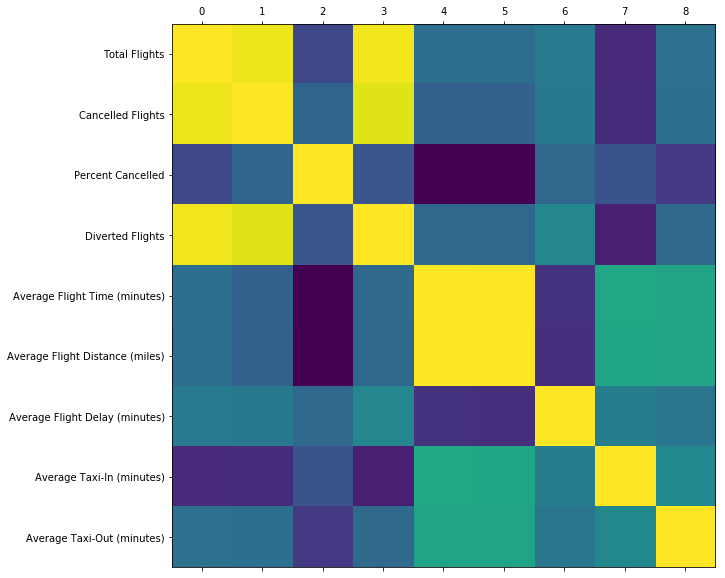

In [11]:
#plt.matshow(summary_table_carrier.corr())
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    #plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(summary_table_carrier)

plt.show()

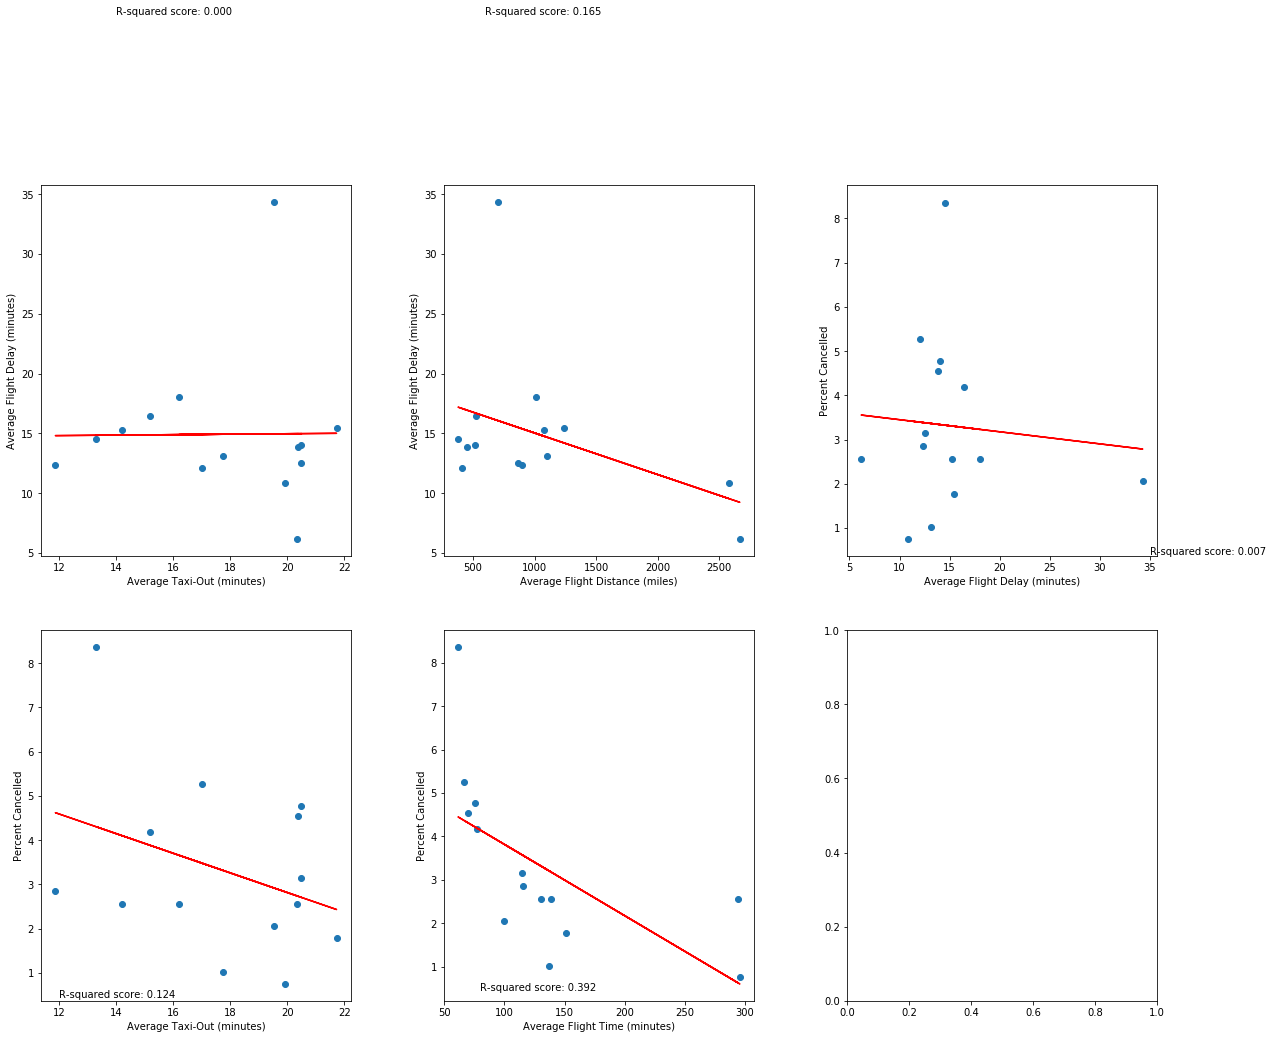

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))


ax1.scatter(carrier_avg_taxiOut, carrier_avg_delay)
X = carrier_avg_taxiOut.values.reshape(-1,1)
linreg = LinearRegression().fit(X, carrier_avg_delay)
ax1.plot(carrier_avg_taxiOut, linreg.coef_ * carrier_avg_taxiOut + linreg.intercept_, 'r-')
ax1.text(14,50,'R-squared score: {:.3f}'
     .format(linreg.score(X, carrier_avg_delay)))
ax1.set_xlabel('Average Taxi-Out (minutes)')
ax1.set_ylabel('Average Flight Delay (minutes)')

####################################################################################

ax2.scatter(carrier_avg_dist, carrier_avg_delay)
X = carrier_avg_dist.values.reshape(-1,1)
linreg = LinearRegression().fit(X, carrier_avg_delay)
ax2.plot(carrier_avg_dist, linreg.coef_ * carrier_avg_dist + linreg.intercept_, 'r-')
ax2.text(600,50,'R-squared score: {:.3f}'
     .format(linreg.score(X, carrier_avg_delay)))
ax2.set_xlabel('Average Flight Distance (miles)')
ax2.set_ylabel('Average Flight Delay (minutes)')

####################################################################################

X = summary_table_carrier['Average Flight Delay (minutes)']
y = summary_table_carrier['Percent Cancelled']
ax3.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax3.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax3.text(35,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax3.set_xlabel('Average Flight Delay (minutes)')
ax3.set_ylabel('Percent Cancelled')

####################################################################################

X = summary_table_carrier['Average Taxi-Out (minutes)']
y = summary_table_carrier['Percent Cancelled']
ax4.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax4.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax4.text(12,0.45,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax4.set_xlabel('Average Taxi-Out (minutes)')
ax4.set_ylabel('Percent Cancelled')

####################################################################################

X = summary_table_carrier['Average Flight Time (minutes)']
y = summary_table_carrier['Percent Cancelled']
ax5.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax5.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax5.text(80,0.45,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax5.set_xlabel('Average Flight Time (minutes)')
ax5.set_ylabel('Percent Cancelled')

fig.subplots_adjust(hspace=0.2, wspace=0.3)

plt.show()

In [13]:
origin_flights = df['ORIGIN'].groupby(df['ORIGIN']).count()
origin_cancelled = df['CANCELLED'].groupby(df['ORIGIN']).sum()
origin_delayed = df_delayed['OP_UNIQUE_CARRIER'].groupby(df_delayed['ORIGIN']).count()
origin_diverted = df['DIVERTED'].groupby(df['ORIGIN']).sum()
origin_avg_time = df['AIR_TIME'].groupby(df['ORIGIN']).mean()
origin_avg_dist = df['DISTANCE'].groupby(df['ORIGIN']).mean()
origin_avg_delay = df['total_delay'].groupby(df['ORIGIN']).mean()
#origin_avg_taxiIn = df['TaxiIn'].groupby(df['Origin']).mean()
origin_avg_taxiOut = df['TAXI_OUT'].groupby(df['ORIGIN']).mean()
origin_pct_cancelled = 100*np.divide(origin_cancelled, origin_flights)

summary_table_origin = pd.concat([origin_flights, origin_cancelled, origin_pct_cancelled, origin_diverted, 
                           origin_avg_time, origin_avg_dist, origin_avg_delay,
                           origin_avg_taxiOut], axis=1)

summary_table_origin.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-Out (minutes)']

summary_table_origin = summary_table_origin.sort_values('Total Flights', ascending=False)
summary_table_origin.head(15)

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-Out (minutes)
ORIGIN,,,,,,,,
LGA,9938,543,5.463876,2,38.881295,184.0,13.568726,23.712316
DCA,8207,289,3.521384,2,63.325796,399.0,15.120751,17.566589
ORD,7346,161,2.191669,6,108.829781,867.0,17.367683,20.198339
ATL,7049,126,1.787488,4,122.052031,946.0,13.367144,16.281316
BWI,5845,200,3.421728,1,59.560773,369.0,13.891360,13.055945
JFK,5769,216,3.744150,3,39.971712,187.0,15.259317,25.376842
LAX,5612,68,1.211689,9,297.822945,2611.0,9.869031,20.057377
PHL,5605,170,3.033006,4,51.878844,280.0,15.902230,22.407315
SFO,5348,54,1.009723,8,301.566213,2704.0,15.202132,22.991025


/Users/patrickcarlin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


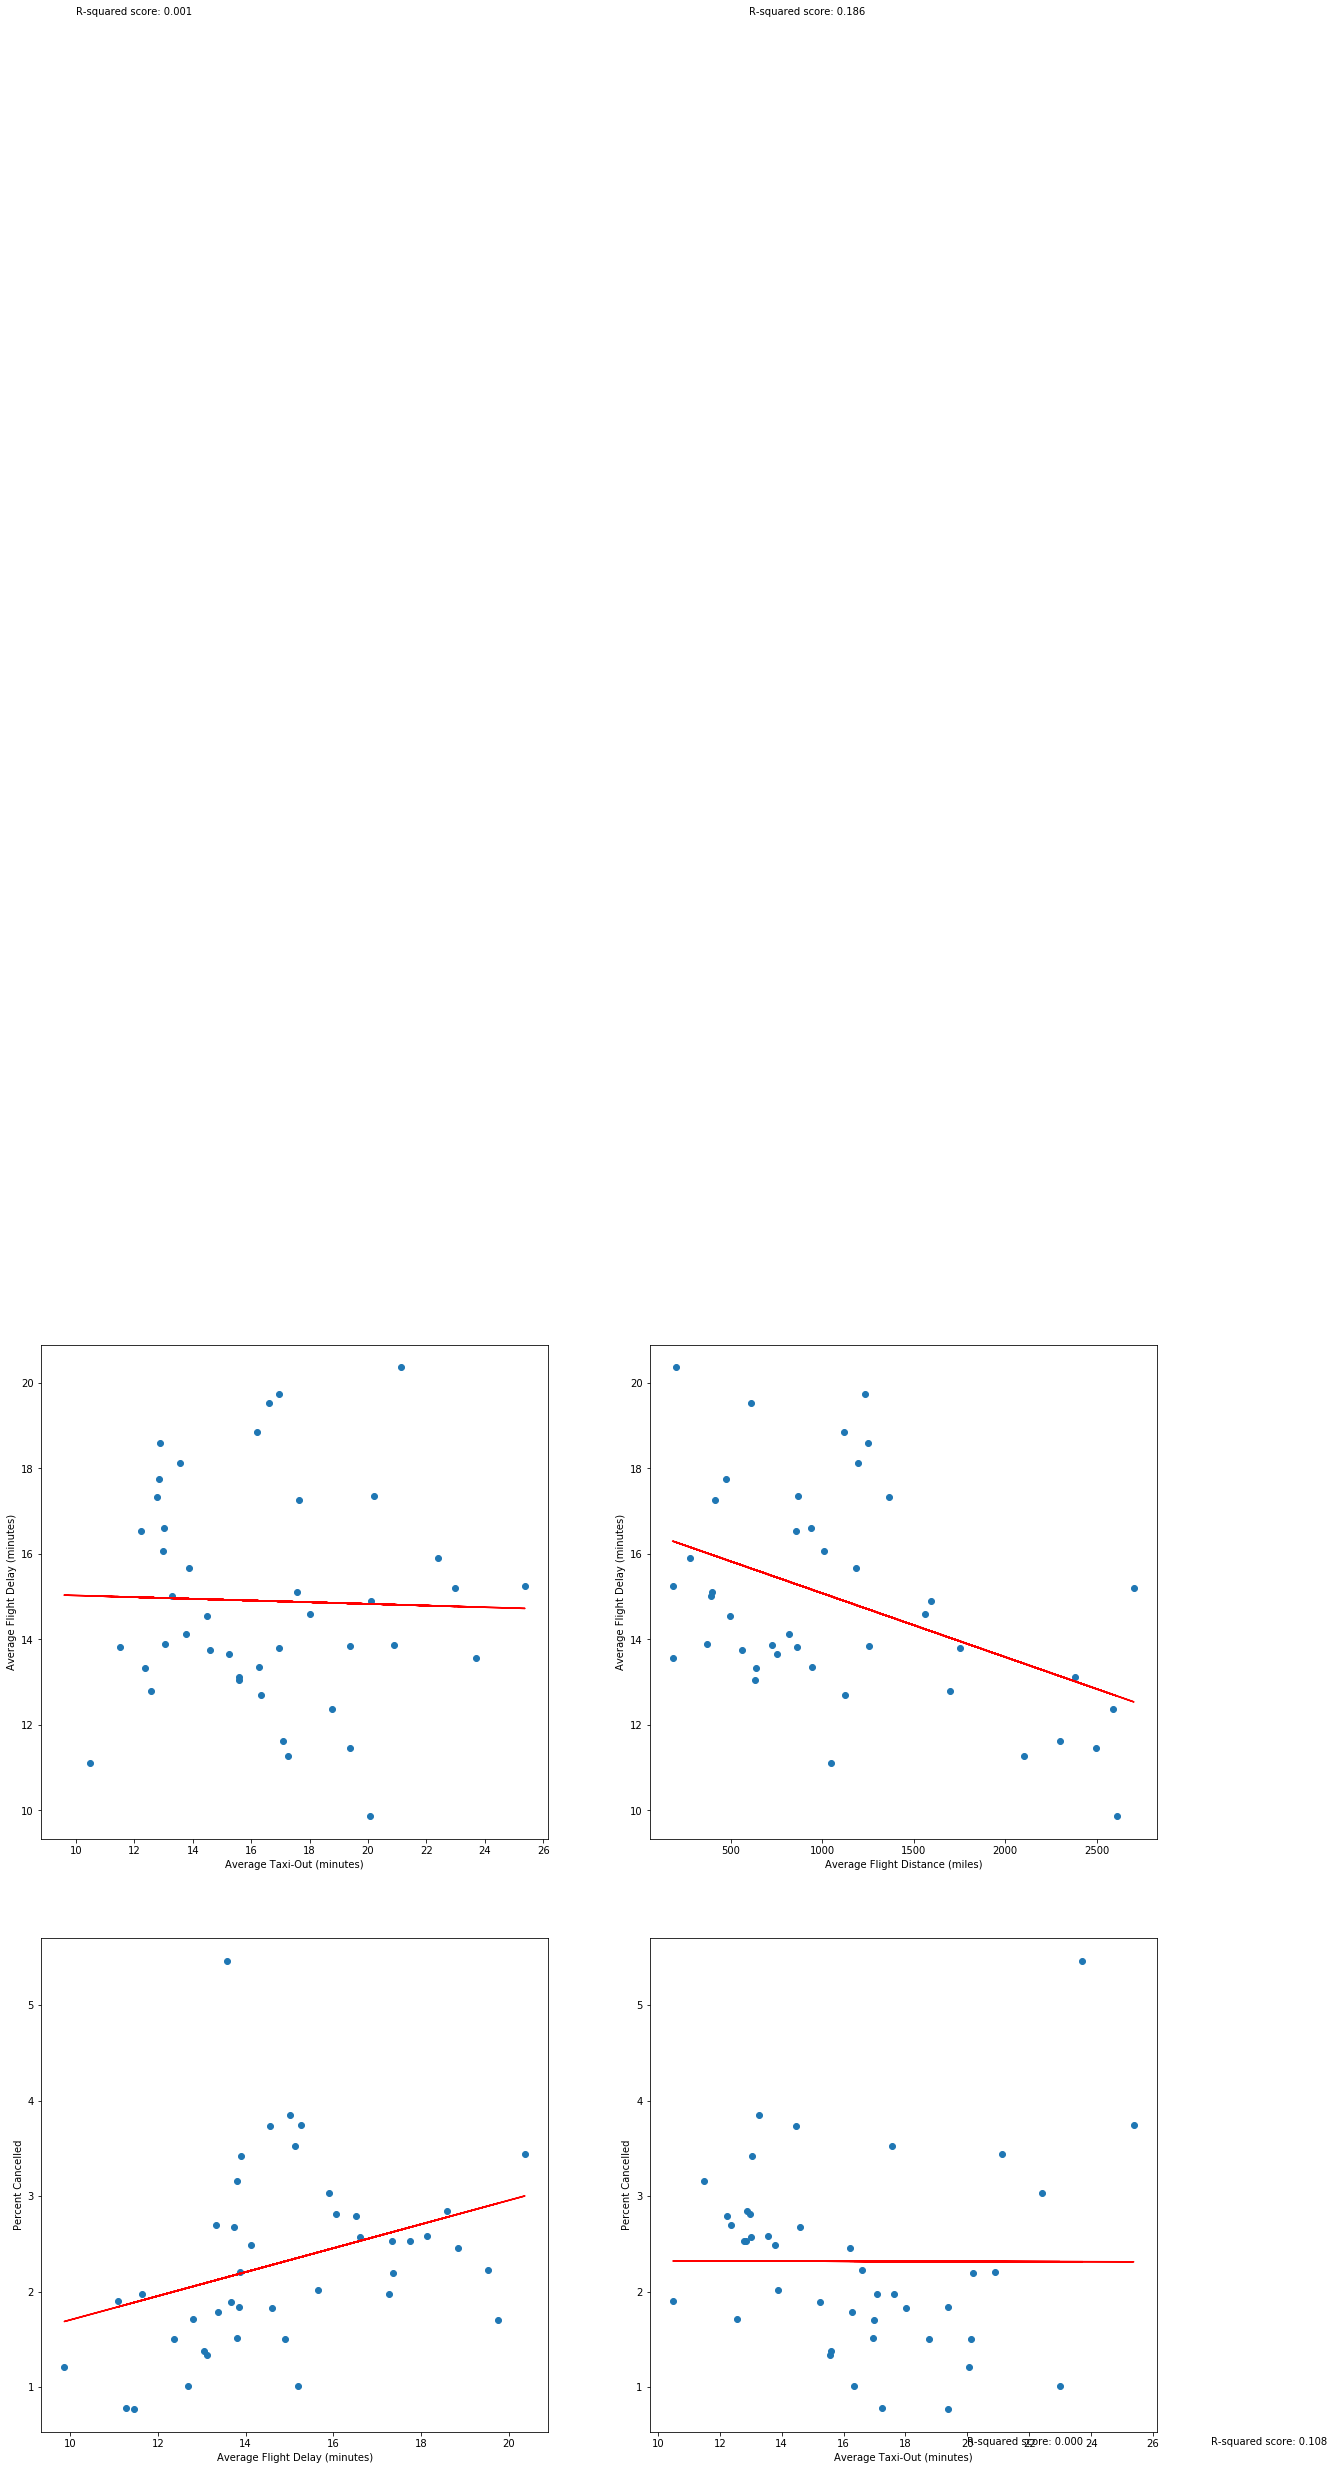

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df1 = summary_table_origin[summary_table_origin['Total Flights']>1000]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

X = df1['Average Taxi-Out (minutes)']
y = df1['Average Flight Delay (minutes)']
ax1.scatter(X, y)

X = X.values.reshape(-1,1)
y = y.values.reshape(1,-1)

from sklearn.preprocessing import Imputer
y_imputer = Imputer(axis=1)

y_imputed = y_imputer.fit_transform(y)
y_imputed = y_imputed[0]

linreg = LinearRegression().fit(X, y_imputed)
ax1.plot(origin_avg_taxiOut, linreg.coef_ * origin_avg_taxiOut + linreg.intercept_, 'r-')
ax1.text(10,52,'R-squared score: {:.3f}'
     .format(linreg.score(X, y_imputed)))
ax1.set_xlabel('Average Taxi-Out (minutes)')
ax1.set_ylabel('Average Flight Delay (minutes)')

####################################################################################

X = df1['Average Flight Distance (miles)']
y = df1['Average Flight Delay (minutes)']
ax2.scatter(X, y)

X = X.values.reshape(-1,1)
y = y.values.reshape(1,-1)

linreg = LinearRegression().fit(X, y_imputed)
ax2.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax2.text(600,52,'R-squared score: {:.3f}'
     .format(linreg.score(X, y_imputed)))
ax2.set_xlabel('Average Flight Distance (miles)')
ax2.set_ylabel('Average Flight Delay (minutes)')

####################################################################################

X = df1['Average Flight Delay (minutes)']
y = df1['Percent Cancelled']
ax3.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax3.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax3.text(36,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax3.set_xlabel('Average Flight Delay (minutes)')
ax3.set_ylabel('Percent Cancelled')

####################################################################################

X = df1['Average Taxi-Out (minutes)']
y = df1['Percent Cancelled']
ax4.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax4.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax4.text(20,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax4.set_xlabel('Average Taxi-Out (minutes)')
ax4.set_ylabel('Percent Cancelled')

plt.show()